# INSTALLMENTS

In [38]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install --upgrade --no-deps statsmodels

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


# Split the data

In [67]:
#----------------------------------------------------
import pandas as pd
import yfinance as yf
import numpy as np 
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import lag_plot
from datetime import datetime


# Load the data from Yahoo Finance
symbol = 'AAPL'  # Example stock symbol
start_date = '2016-01-01'
end_date = '2021-12-31'
data = yf.download(symbol, start=start_date, end=end_date)

# Drop any rows with missing values
data = data.dropna()

# Create a new column for the target variable (the next day's closing price)
data['target'] = data['Close'].shift(-1)

# Drop the last row, which has a missing target value
data = data[:-1]

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)  # Use 80% of the data for training
train_data = data[:train_size]
test_data = data[train_size:]

[*********************100%***********************]  1 of 1 completed


# LINEAR REGRESSION

AAPL Mean Squared Error: 5.136503724061743
AAPL Mean Absolute Error: 1.7898667010643705


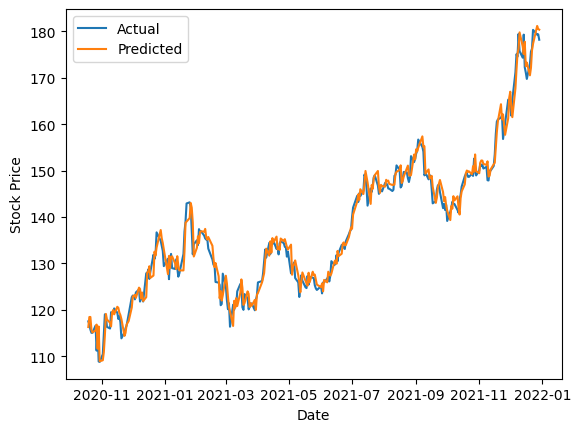

In [42]:
# Create the machine learning model
model = LinearRegression()

# Train the model on the training data
model.fit(train_data[['Open', 'High', 'Low', 'Close']], train_data['target'])

# Use the model to make predictions on the testing data
test_predictions_linear = model.predict(test_data[['Open', 'High', 'Low', 'Close']])

# Calculate the mean squared error and mean absolute error of the predictions
mse_linear = mean_squared_error(test_data['target'], test_predictions_linear)
mae_linear = mean_absolute_error(test_data['target'], test_predictions_linear)
print(symbol + ' Mean Squared Error:', mse_linear)
print(symbol + ' Mean Absolute Error:', mae_linear)


# Plot the actual stock prices and the predicted prices
plt.plot(test_data.index, test_data['target'], label='Actual')
plt.plot(test_data.index, test_predictions_linear, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



# FOR Moving Average


Mean Squared Error: 10.402317213423544
Mean Absolute Error: 2.498080531382721


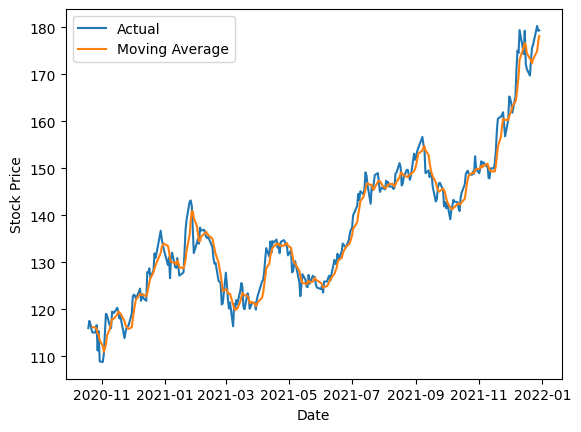

In [43]:
# Calculate the simple moving average
"""
window size is the number of data points used in a moving average filter. The larger the window size the more data points
are used for the averaging process and the more smoothing is applied to the signal,grpahs, values, whatever 
"""
rolling_mean = test_data['Close'].rolling(window=5).mean()

# Use the rolling mean to make predictions on the testing data
test_prediction = rolling_mean[4:]  # Adjusted to match the length of test_data['target']



# Calculate MSE
mse_moving = mean_squared_error(test_data['target'][4:], test_prediction)
print(f"Mean Squared Error: {mse_moving}")

#Calculate MAE
mae_moving = mean_absolute_error(test_data['target'][4:], test_prediction)
print(f"Mean Absolute Error: {mae_moving}")

# Plot the actual stock prices, the predicted prices, and the moving average
plt.plot(test_data.index, test_data['Close'], label='Actual')
plt.plot(test_data.index, rolling_mean, label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



# For Exponential Smoothing

TEST 0.1 20.71480176674522 653.1483333112972
TEST 0.2 19.674552842239596 605.7988441065645
TEST 0.3 19.43332639540521 595.1193534819193
Mean Squared Error: 595.1193534819193
Mean Absolute Error: 19.43332639540521


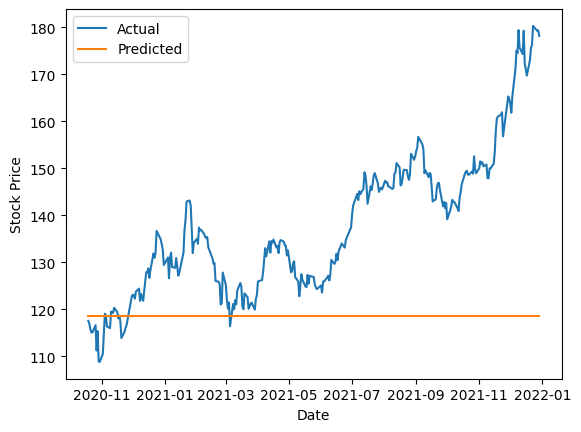

In [44]:
#_____________________________________________________MAYBE_______________________________________________________

import warnings
warnings.filterwarnings("ignore") #change to ignor to ignore warning, change to default to see the warning
# Create the machine learning model
model = SimpleExpSmoothing(train_data['target'])

# Train the model on the training data
# We can change the smoothing level and if our model is optimized or not.
# We will try all the variants in order to find the best model
best_mae = 1000
best_mse = 1000
best_smoothing_level = 0



for i in range(0, 10):
    level = i/10
    model_fit = model.fit(smoothing_level = level, optimized = False)
    
    # Use the model to make predictions on the testing data
    test_predictions = model_fit.forecast(len(test_data))
    #Calculatoin of MSE
    mse_smooting = mean_squared_error(test_data['target'], test_predictions)
    

    #Calcualtion of MAE (mean absolute error)
    mae_smooting = mean_absolute_error(test_data['target'], test_predictions)
    # print(level, mse_smooting, mae_smooting)
    
    if best_mae > mae_smooting  and best_mse >  mse_smooting :
        best_mae = mae_smooting
        best_mse =  mse_smooting
        best_smoothing_level = level
        print("TEST", level, best_mae, best_mse)


model_fit = model.fit(smoothing_level = best_smoothing_level, optimized = False)
# Use the model to make predictions on the testing data
test_predictions = model_fit.forecast(len(test_data))

#Calculatoin of MSE
mse_smooting = mean_squared_error(test_data['target'], test_predictions)
print(f"Mean Squared Error: {mse_smooting}")

#Calcualtion of MAE (mean absolute error)
mae_smooting = mean_absolute_error(test_data['target'], test_predictions)
print(f"Mean Absolute Error: {mae_smooting}")

# Plot the actual stock prices and the predicted prices
plt.plot(test_data.index, test_data['target'], label='Actual')
plt.plot(test_data.index, test_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()




# Double Exponetial Smooting

Mean Squared Error: 65.7272279319888
Mean Absolute Error: 6.499405329284156


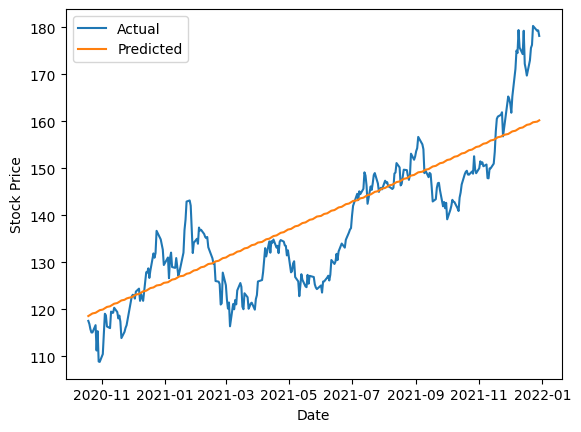

In [45]:
#_____________________________________________________MAYBE_______________________________________________________
# Create the machine learning model
step = 0.1
best_mae = 1000
best_mse = 1000
best_smoothing_leve = 0
best_smoothing_trend = 0
for i in range(0, 10):
    for j in range(0, 10):
        model = ExponentialSmoothing(train_data['target'], trend="add").fit(smoothing_level=i*step,smoothing_trend=j*step)
    
        # Use the model to make predictions on the testing data
        test_predictions = model.forecast(len(test_data))
        #Calculatoin of MSE
        mse_doublesmooting = mean_squared_error(test_data['target'], test_predictions)
    

        #Calcualtion of MAE (mean absolute error)
        mae_doublesmooting = mean_absolute_error(test_data['target'], test_predictions)
    
        if best_mae > mae_doublesmooting  or best_mse >  mse_doublesmooting:
            best_mae = mae_doublesmooting
            best_mse =  mse_doublesmooting
            best_smoothing_leve = i*step
            best_smoothing_trend = j*step
    

# Train the model on the training data
model = ExponentialSmoothing(train_data['target'], trend="add").fit(smoothing_level=best_smoothing_leve,smoothing_trend=best_smoothing_trend )

# Use the model to make predictions on the testing data
test_predictions = model.forecast(len(test_data))

#Calculatoin of MSE
mse_doublesmooting = mean_squared_error(test_data['target'], test_predictions)
print(f"Mean Squared Error: {mse_doublesmooting}")

#Calcualtion of MAE (mean absolute error)
mae_doublesmooting = mean_absolute_error(test_data['target'], test_predictions)
print(f"Mean Absolute Error: {mae_doublesmooting}")

# Plot the actual stock prices and the predicted prices
plt.plot(test_data.index, test_data['target'], label='Actual')
plt.plot(test_data.index, test_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()





# Triple Smoothing

Mean Squared Error: 74.77196066358205
Mean Absolute Error: 7.075089217274425


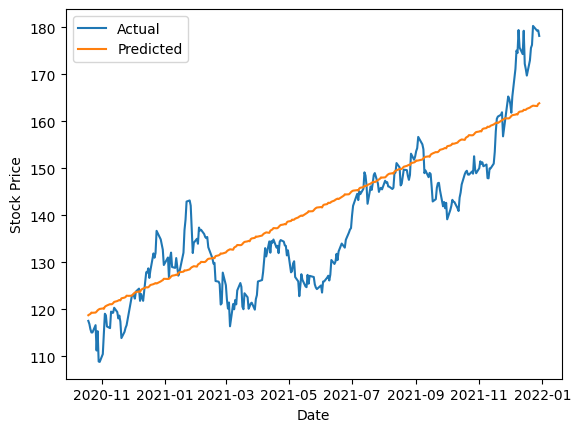

In [46]:
best_mae = 1000
best_mse = 1000
best_smoothing_level = 0
best_smoothing_trend = 0
best_smoothing_seasonal = 0
for i in range(0, 10):
    for j in range(0, 10):
        for z in range(0,7):
            model = ExponentialSmoothing(train_data['target'],
                                 trend="add",
                                 seasonal="add",
                                 seasonal_periods=10).fit(smoothing_level=i/10,
                                                          smoothing_trend=j/10,
                                                          smoothing_seasonal=z/10)
            # Use the model to make predictions on the testing data

            test_predictions = model.forecast(len(test_data))
            #Calculatoin of MSE
            mse_triplesmooting = mean_squared_error(test_data['target'], test_predictions)
    

            #Calcualtion of MAE (mean absolute error)
            mae_triplesmooting = mean_absolute_error(test_data['target'], test_predictions)
    
            if best_mae > mae_triplesmooting  and best_mse >  mse_triplesmooting :
                best_mae = mae_triplesmooting
                best_mse =  mse_triplesmooting 
                best_smoothing_level = i/10
                best_smoothing_trend = j/10
                best_smoothing_seasonal = z/10
    
# Create the machine learning model        

model = ExponentialSmoothing(train_data['target'],
                                 trend="add",
                                 seasonal="add",
                                 seasonal_periods=12).fit(smoothing_level=  best_smoothing_level,
                                                          smoothing_trend=best_smoothing_trend,
                                                          smoothing_seasonal=best_smoothing_seasonal)

# Use the model to make predictions on the testing data
test_predictions = model.forecast(len(test_data))

#Calculatoin of MSE
mse_triplesmooting = mean_squared_error(test_data['target'], test_predictions)
print(f"Mean Squared Error: {mse_triplesmooting}")

#Calcualtion of MAE (mean absolute error)
mae_triplesmooting = mean_absolute_error(test_data['target'], test_predictions)
print(f"Mean Absolute Error: {mae_triplesmooting}")

# Plot the actual stock prices and the predicted prices
plt.plot(test_data.index, test_data['target'], label='Actual')
plt.plot(test_data.index, test_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Autoregression


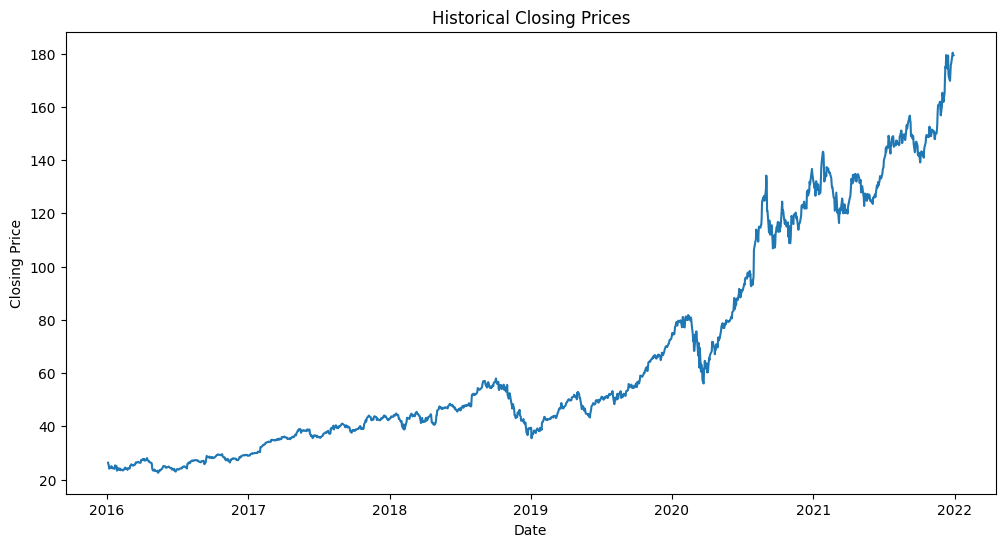

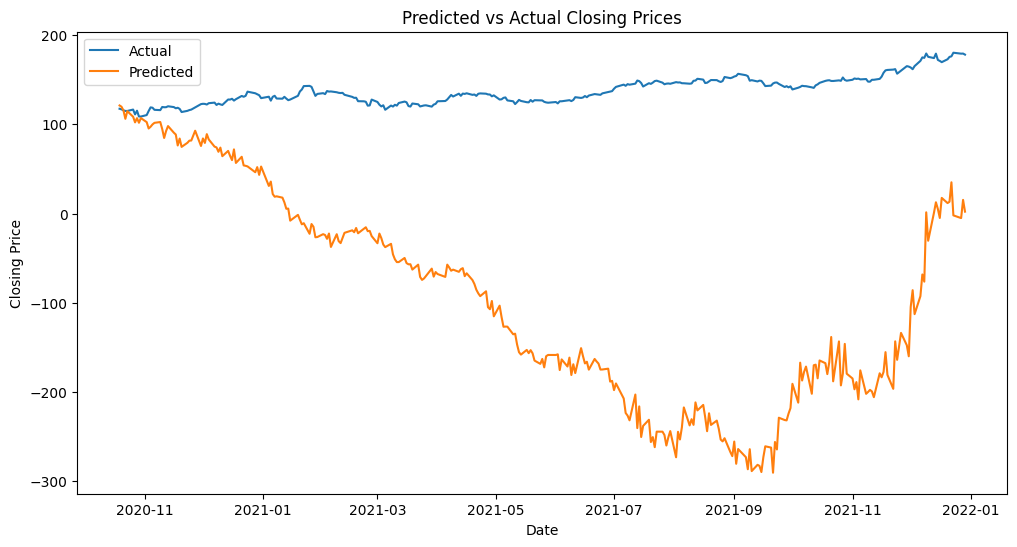

In [47]:
# Extract the feature (predictor) and target variables from the training and testing data
train_features = train_data['Close']
train_target = train_data['target']
test_features = test_data['Close']
test_target = test_data['target']

# Create the autoregression model using 555 lags
model = AutoReg(train_features, lags=555)

# Fit the autoregression model to the training data
model_fit = model.fit()

# Use the fitted model to make predictions on the testing data
predictions = model_fit.predict(start=len(train_features), end=len(train_features)+len(test_features)-1)


# Plot the historical closing prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Plot the predicted and actual closing prices for the testing data
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_target, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.title('Predicted vs Actual Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [48]:
idk=pd.Series(test_data['target']).array
idk1=pd.Series(predictions).array
y=idk
yhat=idk1
d = y - yhat
mse_autoregression = np.mean(d**2)
mae_autoregression = np.mean(abs(d))

print("Results by manual calculation:")
print("MAE:",mae_autoregression)
print("MSE:", mse_autoregression)

Results by manual calculation:
MAE: 234.38900423088432
MSE: 70520.21458318541


# For ARIMA Model

In [70]:
training_data = train_data['Close'].values
testing_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(testing_data)
best_aic = np.inf
best_order = None
best_model = None
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = testing_data[time_point]
    history.append(true_test_value)
    
MSE_error = mean_squared_error(testing_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
MAE_error = mean_absolute_error(testing_data, model_predictions)
print('Testing Mean Absolut Error is {}'.format(MAE_error))

Testing Mean Squared Error is 5.192575718497793
Testing Mean Absolut Error is 1.7308172504015162


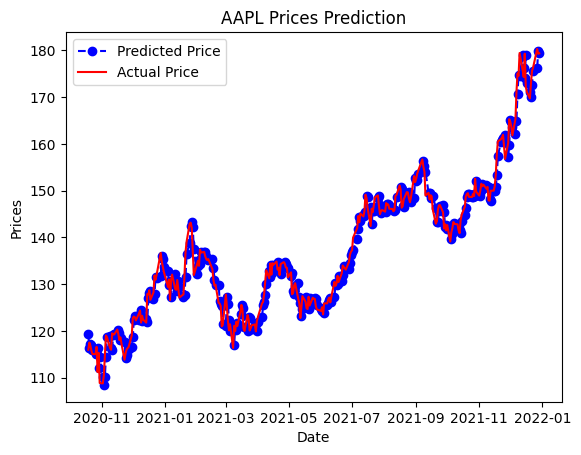

In [71]:
test_set_range = data[int(len(data)*0.8):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, testing_data, color='red', label='Actual Price')
plt.title('AAPL Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

# Evaluation

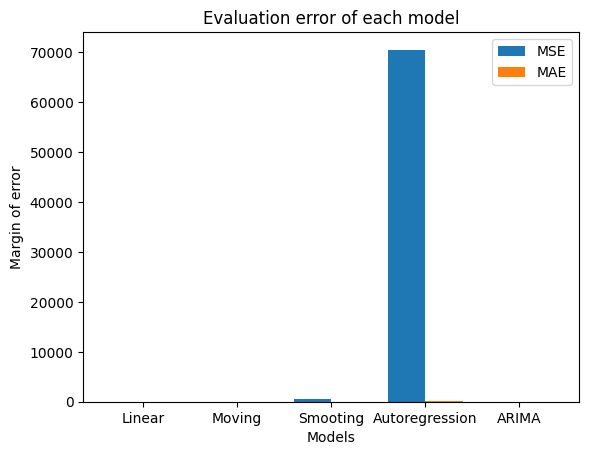

In [60]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Linear','Moving','Smooting','Autoregression','ARIMA']
Ymse = [mse_linear,mse_moving,mse_smooting ,mse_autoregression,MSE_error]
Zmas = [mae_linear,mae_moving,mae_smooting ,mae_autoregression,MAE_error]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ymse, 0.4, label = 'MSE')
plt.bar(X_axis + 0.2, Zmas, 0.4, label = 'MAE')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Margin of error")
plt.title("Evaluation error of each model")
plt.legend()
plt.show()

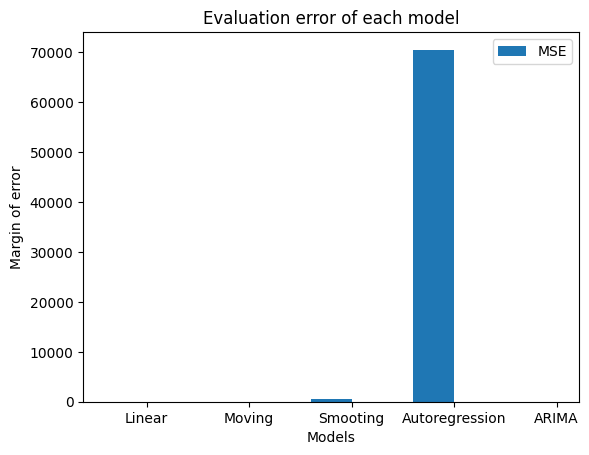

In [61]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Linear','Moving','Smooting','Autoregression','ARIMA']
Ymse = [mse_linear,mse_moving,mse_smooting ,mse_autoregression,MSE_error]
Zmas = [mae_linear,mae_moving,mae_smooting ,mae_autoregression,MAE_error]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ymse, 0.4, label = 'MSE')
#plt.bar(X_axis + 0.2, Zmas, 0.4, label = 'MAE')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Margin of error")
plt.title("Evaluation error of each model")
plt.legend()
plt.show()

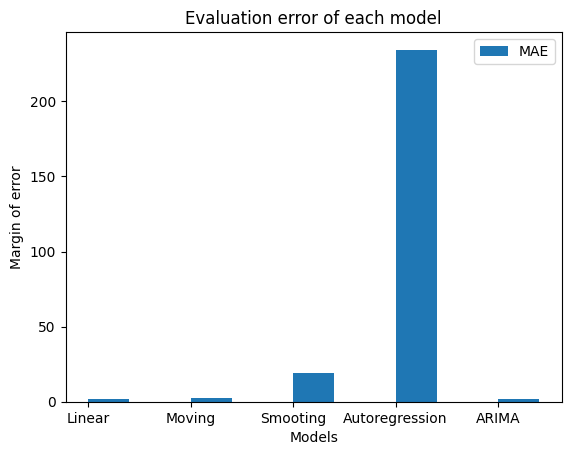

In [62]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Linear','Moving','Smooting','Autoregression','ARIMA']
Ymse = [mse_linear,mse_moving,mse_smooting ,mse_autoregression,MSE_error]
Zmas = [mae_linear,mae_moving,mae_smooting ,mae_autoregression,MAE_error]
  
X_axis = np.arange(len(X))
  
#plt.bar(X_axis - 0.2, Ymse, 0.4, label = 'MSE')
plt.bar(X_axis + 0.2, Zmas, 0.4, label = 'MAE')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Margin of error")
plt.title("Evaluation error of each model")
plt.legend()
plt.show()

# Evaluation of different smoothing methods

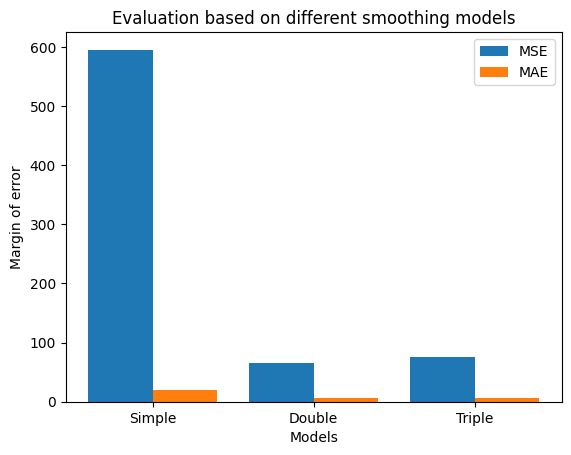

In [63]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Simple','Double','Triple']
Ymse = [mse_smooting,mse_doublesmooting,mse_triplesmooting]
Zmas = [mae_smooting,mae_doublesmooting,mae_triplesmooting]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ymse, 0.4, label = 'MSE')
plt.bar(X_axis + 0.2, Zmas, 0.4, label = 'MAE')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Margin of error")
plt.title("Evaluation based on different smoothing models")
plt.legend()
plt.show()

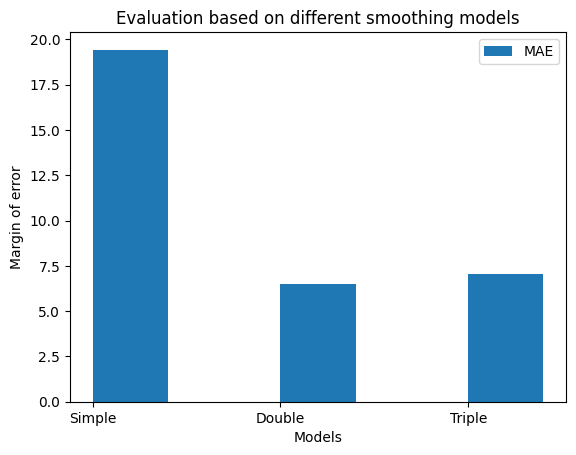

In [64]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Simple','Double','Triple']
Ymse = [mse_smooting,mse_doublesmooting,mse_triplesmooting]
Zmas = [mae_smooting,mae_doublesmooting,mae_triplesmooting]
  
X_axis = np.arange(len(X))
  
#plt.bar(X_axis - 0.2, Ymse, 0.4, label = 'MSE')
plt.bar(X_axis + 0.2, Zmas, 0.4, label = 'MAE')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Margin of error")
plt.title("Evaluation based on different smoothing models")
plt.legend()
plt.show()

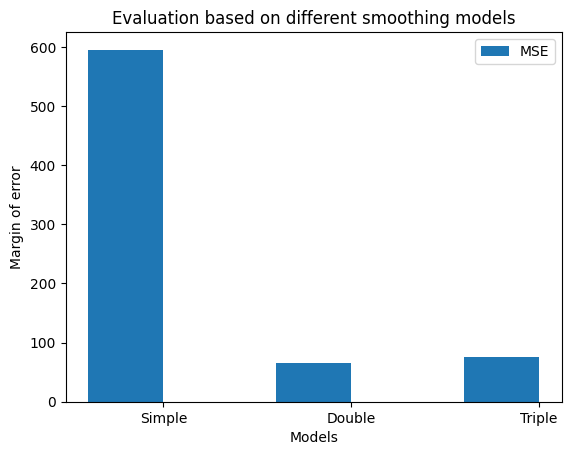

In [65]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Simple','Double','Triple']
Ymse = [mse_smooting,mse_doublesmooting,mse_triplesmooting]
Zmas = [mae_smooting,mae_doublesmooting,mae_triplesmooting]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ymse, 0.4, label = 'MSE')
#plt.bar(X_axis + 0.2, Zmas, 0.4, label = 'MAE')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Margin of error")
plt.title("Evaluation based on different smoothing models")
plt.legend()
plt.show()

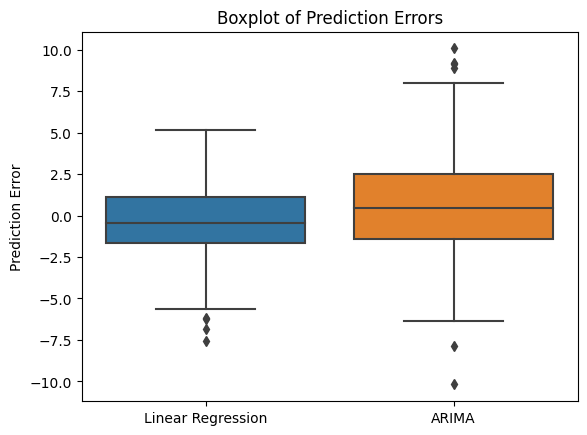

T-test result:  Ttest_indResult(statistic=-3.4389525829234278, pvalue=0.000624322565896467)
p-value:  0.000624322565896467
ARIMA has a significantly higher mean.


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate the errors for linear regression and moving average predictions
linear_errors = test_data['target'] - test_predictions_linear
arima_errors = test_data['target']- model_predictions

# Create a dataframe with the errors
errors_df = pd.DataFrame({'Linear Regression': linear_errors, 'ARIMA': arima_errors})

# Plot the boxplot with errors
sns.boxplot(data=errors_df)
plt.title('Boxplot of Prediction Errors')
plt.ylabel('Prediction Error')
plt.show()

# perform a two-sample t-test
result = stats.ttest_ind(linear_errors, arima_errors)
print('T-test result: ', result)

# print the p-value
pvalue = result.pvalue
print('p-value: ', pvalue)

# interpret the p-value
alpha = 0.05
if pvalue > alpha:
    print('The means of the two groups are not significantly different.')
else:
    if np.mean(linear_errors) > np.mean(arima_errors):
        print('linear Regression has a significantly higher mean.')
    else:
        print('ARIMA has a significantly higher mean.')
